In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/protein_data.csv')
data.head()

,sequence,classification
0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...,OXIDOREDUCTASE
1,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...,HYDROLASE
2,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,OXIDOREDUCTASE
3,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...,VIRAL PROTEIN
4,EVKQENRLLNESESSSQGLLGYYFSDLNFQAPMVVTSSTTGDLSIP...,TOXIN


In [3]:
X = data['sequence']
y = data['classification']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
n_classes = len(class_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

## Naive Bayes

In [6]:
prediction = dict()

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)
NB_pred = model.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(NB_pred, y_test)
print(prediction['MultinomialNB'])

0.8792610228300389


<Axes: >

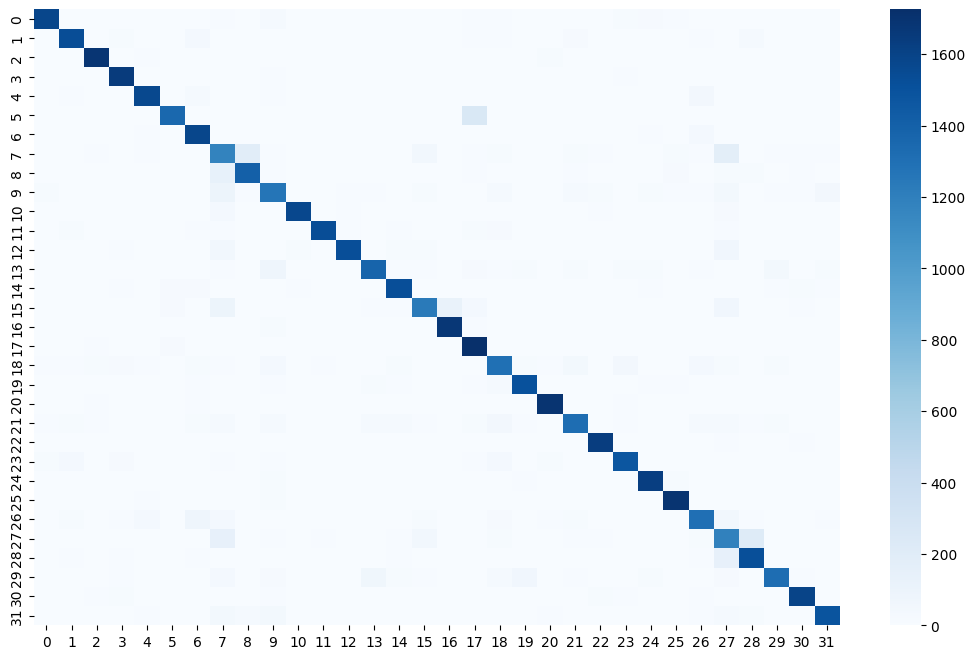

In [7]:
conf_mat = confusion_matrix(y_test, NB_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## xgboost

In [8]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_df,y_train)
XGB_pred = model.predict(X_test_df)
prediction["XGB"] = accuracy_score(XGB_pred , y_test)
print(prediction["XGB"])

0.8772862336895336


<Axes: >

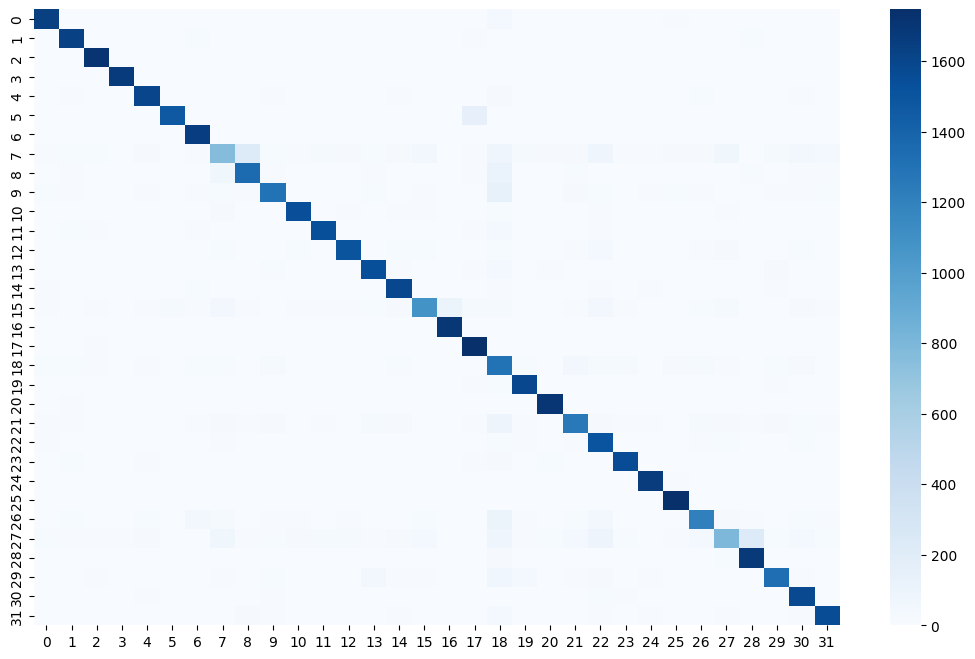

In [9]:
conf_mat = confusion_matrix(y_test, XGB_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=-1)
model.fit(X_train_df,y_train)
LR_pred = model.predict(X_test_df)
prediction["Logistic Regression"] = accuracy_score(LR_pred , y_test)
print(prediction["Logistic Regression"])

0.8997286971928464


<Axes: >

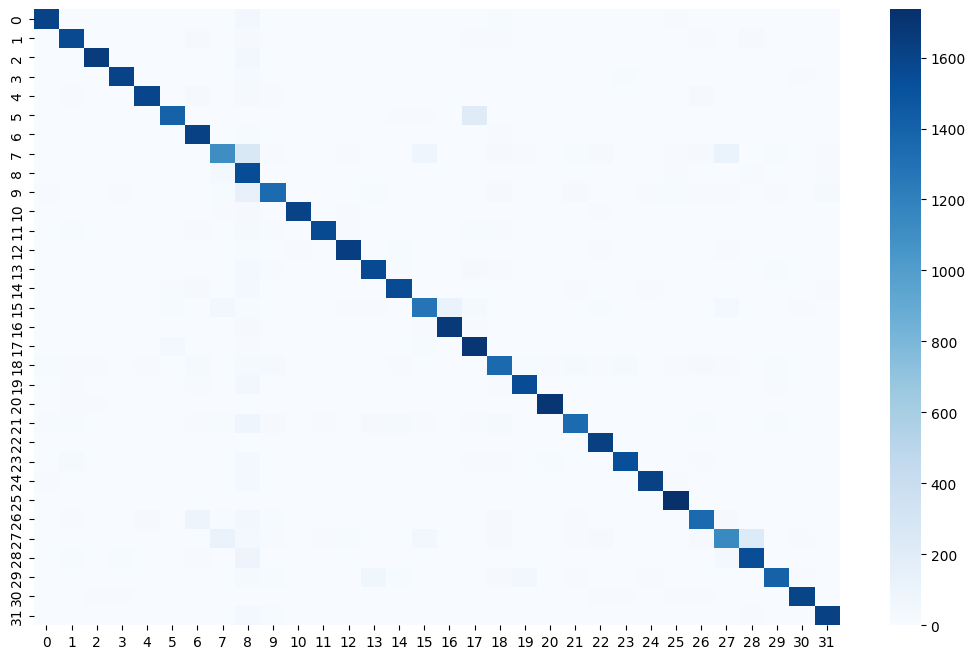

In [11]:
conf_mat = confusion_matrix(y_test, LR_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train_df,y_train)
KNN_pred = model.predict(X_test_df)
prediction["KNN"] = accuracy_score(KNN_pred , y_test)
print(prediction["KNN"])

0.9000793606850858


<Axes: >

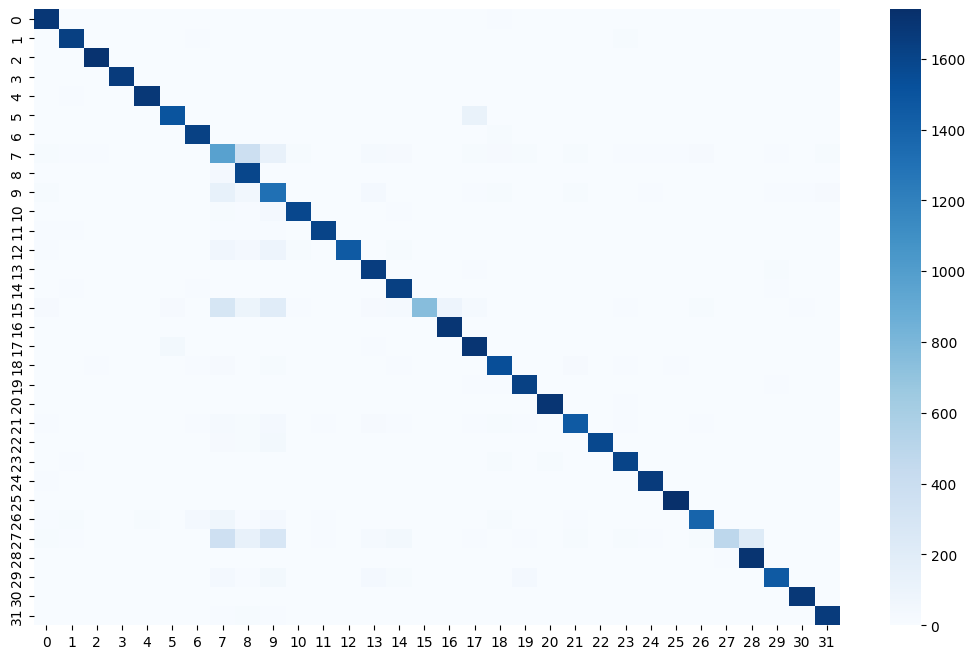

In [13]:
conf_mat = confusion_matrix(y_test, KNN_pred)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")